# Example of erddap dataset access in pyferret

## Basic Description of Content in this Notebook

This notebook identifies a few tasks:
- using pyferret (in a jupyter notebook) : python3, pyferret, pyferret-magic
- accessing erddap data (via opendap in python/xarray and ferret)
    + xarray is a "pandas like library for multi-dimensional array data" and plays very well with CF/COARDS netcdf files
- using erddapy (python) for erddap exploration (**FUTURE WORK**) 
    + see [https://ioos.github.io/erddapy](https://ioos.github.io/erddapy) for basic description and guidance
- searching erddap clients for potential datasets
- some additional tips and tricks

Short list of convenient ERDDAP Servers
- https://coastwatch.pfeg.noaa.gov/erddapinfo/index.html (SWFSC)
- https://ferret.pmel.noaa.gov/pmel/erddap/index.html (PMEL - FOCI Public data would be here)
- https://polarwatch.noaa.gov/erddap/index.html
- http://erddap.aoos.org/erddap/index.html

Github Repo of great Additional Resources (including more servers, multi-search urls, and software/tools developed for erddap)
- https://github.com/IrishMarineInstitute/awesome-erddap

**note** - erddap is currently at v2.11 (as of Jan 2021) and although older versions work just fine, the version being utilized could be interpreted as a proxy for the amount of support/development energy at each institution

In [1]:
import pyferret

In [2]:
%load_ext ferretmagic

#note: in the following cells the `%%ferret` is cell magic for jupyter-labs and pyferret integration 
#  and is not part of the standard pyferret implementation

## List the details of a single dataset using pyferret/ferret

Notice that I am using the full url to a public dataset but with **no** filetype ending:
https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/dy1104_profile_data - This is how ferret recognizes the opendap protocol.

In [7]:
%%ferret

yes? use "http://akutan.pmel.noaa.gov:8080/erddap/tabledap/PSEA1001_profile_data"
show data

currently SET data sets:
 1> https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/dy1104_profile_data
 name title I J K L M N
 S.ID profile id ... ... ... ... 1:26 ...
 S.CAST cast number ... ... ... ... 1:26 ...
 S.CRUISE Cruise name ... ... ... ... 1:26 ...
 S.TIME Time ... ... ... ... 1:26 ...
 S.LONGITUDE
 station longitude ... ... ... ... 1:26 ...
 S.LON360 station longitude 360 ... ... ... ... 1:26 ...
 S.LATITUDE
 station latitude ... ... ... ... 1:26 ...
 S.DEPTH Depth ... ... ... ... 1:26 ...
 S.OCEAN_PRACTICAL_SALINITY_2
 Salinity 2 (PSU PSS-78) ... ... ... ... 1:26 ...
 S.OCEAN_PRACTICAL_SALINITY_1
 Salinity 1 (PSU PSS-78) ... ... ... ... 1:26 ...
 S.OCEAN_DISSOLVED_OXYGEN_CONCENTRATION_2_MMPERKG
 Dissolved Oxygen Concentration ... ... ... ... 1:26 ...
 S.OCEAN_TEMPERATURE_1
 Temperature 1 ... ... ... ... 1:26 ...
 S.OCEAN_OXYGEN_SATURATION_1
 Oxygen Percent Saturation 1 ... ... ... ... 1:26 ...
 S.OCEAN_DISSOLVED_OXYGEN_CONCENTRATION_1_MMPERKG
 Dissolved Oxygen Concentration ... ... ... ... 1:26 ...
 S.OCEAN_TEMPERATURE_2
 Temperature 2 ... ... ... ... 1:26 ...
 S.SEA_WATER_NUTRIENT_BOTTLE_NUMBER
 Nutrients Niskin Bottle Number ... ... ... ... 1:26 ...
 S.PHOTOSYNTHETICALLY_ACTIVE_RADIATION
 Photosynthetically Active Radia ... ... ... ... 1:26 ...
 S.PHOTOSYNTHETICALLY_ACTIVE_RADIATION_RAW
 Raw Photosynthetically Active R ... ... ... ... 1:26 ...
 S.OCEAN_CHLOROPHYLL_A_CONCENTRATION_FACTORYCAL
 Chlorophyll a Concentration (Fa ... ... ... ... 1:26 ...
 S.OCEAN_SIGMA_T
 Sigma-T density of seawater at ... ... ... ... 1:26 ...
 S.OCEAN_DYNAMIC_HEIGHT
 Dynamic Height ... ... ... ... 1:26 ...
 S.SEA_WATER_AMMONIUM_CONCENTRATION
 Sea Water Ammonium Concentratio ... ... ... ... 1:26 ...
 S.SEA_WATER_NITRATE_CONCENTRATION
 Nitrate concentration NO3 ... ... ... ... 1:26 ...
 S.SEA_WATER_SILICATE_CONCENTRATION
 Silicate concentration SI ... ... ... ... 1:26 ...
 S.SEA_WATER_PHOSPHATE_CONCENTRATION
 Phosphate concentration PO4 ... ... ... ... 1:26 ...
 S.SEA_WATER_NITRITE_CONCENTRATION
 Nitrite concentration NO2 ... ... ... ... 1:26 ...
 S.OCEAN_CHLOROPHYLL_FLUORESCENCE_RAW
 ... ... ... ... 1:26 ...
 
 2> http://akutan.pmel.noaa.gov:8080/erddap/griddap/PSEA1001_profile_data_gridded
 name title I J K L
 T_28 TEMPERATURE (C) ... ... 1:73 1:85
 T2_35 Secondary Temperature ... ... 1:73 1:85
 S_41 SALINITY (PSU) ... ... 1:73 1:85
 S_42 SALINITY (PSU) ... ... 1:73 1:85
 ST_70 SIGMA-T (KG/M**3) ... ... 1:73 1:85
 DYN_10 DYNAMIC METERS ... ... 1:73 1:85
 RFV_971 raw fluorometer Volts(CTD) ... ... 1:73 1:85
 CLA_2930 Fl Chl-a, Factory Cal. ... ... 1:73 1:85
 O_60 OXYGEN (ML/L) ... ... 1:73 1:85
 O_65 OXYGEN (UMOL/KG) ... ... 1:73 1:85
 OST_62 OXYGEN, %SAT ... ... 1:73 1:85
 ATTN_55 ATTENUATION ... ... 1:73 1:85
 TR_904 Transmissometry (CTD) ... ... 1:73 1:85
 PAR_905 Photosynthetic Active Radiation ... ... 1:73 1:85
 SPAR_918 Surface Photosynthetically Acti ... ... 1:73 1:85
 BTL_103 NISKIN BOTTLE NUMBER ... ... 1:73 1:85
 PO4_286 PHOSPHATE (micromoles/kg) ... ... 1:73 1:85
 SI_288 SILICATE (micromoles/kg) ... ... 1:73 1:85
 NO3_282 NITRATE (micromoles/kg) ... ... 1:73 1:85
 NO2_284 NITRITE (micromoles/kg) ... ... 1:73 1:85
 NH4_289 AMMONIUM (micromoles/kg) ... ... 1:73 1:85
 CHL_933 Upcast Fl Chl-a, Factory Cal. ... ... 1:73 1:85
 CLA_2933 Upcast Chl-a, Discrete Lab Samp ... ... 1:73 1:85
 CLA_2936 Welschmeyer Chlorophyll-a total ... ... 1:73 1:85
 FPH_907 Phaeopigments ... ... 1:73 1:85
 PAR_CORRECTED
 Photosynthetic Active Radiation ... ... 1:73 1:85
 CHL_FL_CALIBRATED
 Fl Chl-a, Discrete Lab Sample C ... ... 1:73 1:85
 THETA_0 Potential Temperature, ref to 0 ... ... 1:73 1:85
 SIGMA_0 Potential Density Anomaly, ref ... ... 1:73 1:85
 WATER_MASS
 Water Mass Type ... ... 1:73 1:85
 
 3> http://akutan.pmel.noaa.gov:8080/erddap/tabledap/PSEA1001_profile_data (default)
 name title I J K L M N
 S.DEPTH Pressure ... ... ... ... 1:73 ...
 S.TIME CTD DATE AX ... ... ... ... 1:73 ...
 S.CRUISE Cruise ... ... ... ... 1:73 ...
 S.PROFILE_ID
 CTD 

## Do the same with xarray

In [4]:
import xarray as xa

In [5]:
dataset = xa.open_dataset("https://ferret.pmel.noaa.gov/pmel/erddap/tabledap/dy1104_profile_data")

In [ ]:
dataset

In [7]:
#the above implentaton fails and it is unclear why, but it is not unique to the PMEL ctd tabular data

Notice: The data retrieved via a tabledap is in serial format (notice the S.{parameter}) as the data is in "DSG" formats and is effectively indexed by a unique table row.  I am not sufficiently versed in ferret to know how to manipulate this currently and there are alternatives to ferret to working with this datastyle.

## Plot the data retrieved

Gridded datasets will be more straight forward to use via opendap than the tabular datasets

In [8]:
%%ferret

yes? use "https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21NrtAgg"
show data

currently SET data sets:
 1> http://akutan.pmel.noaa.gov:8080/erddap/tabledap/datasets_Mooring_16bsm2a_final
 name title I J K L M N
 S.TIME Time ... ... ... ... 1:264297 ...
 S.DEPTH Depth ... ... ... ... 1:264297 ...
 S.LATITUDE
 Latitude ... ... ... ... 1:264297 ...
 S.LONGITUDE
 Longitude ... ... ... ... 1:264297 ...
 S.TEMPERATURE
 Sea temperature in-situ ITS-90 ... ... ... ... 1:264297 ...
 S.PRESSURE
 Sea water pressure, equals 0 at ... ... ... ... 1:264297 ...
 S.SALINITY
 ... ... ... ... 1:264297 ...
 S.PAR ... ... ... ... 1:264297 ...
 S.CHLOROPHYLL_FLUORESCENCE
 ... ... ... ... 1:264297 ...
 S.OXYGEN_SATURATION
 ... ... ... ... 1:264297 ...
 S.OXYGEN_CONCENTRATION
 ... ... ... ... 1:264297 ...
 S.TIMESERIES_ID
 ... ... ... ... 1:264297 ...
 S.INSTRUMENT_IDENTIFIER
 ... ... ... ... 1:264297 ...
 S.SERIAL_NUMBER
 ... ... ... ... 1:264297 ...
 S.WATER_DEPTH
 ... ... ... ... 1:264297 ...
 
 2> https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21NrtAgg (default)
 name title I J K L
 SST Daily sea surface temperature 1:1440 1:720 1:1 1:253
 ANOM Daily sea surface temperature a 1:1440 1:720 1:1 1:253
 ERR Estimated error standard deviat 1:1440 1:720 1:1 1:253
 ICE Sea ice concentration 1:1440 1:720 1:1 1:253

***Recent SST from the NCDC OI 0.25deg product***


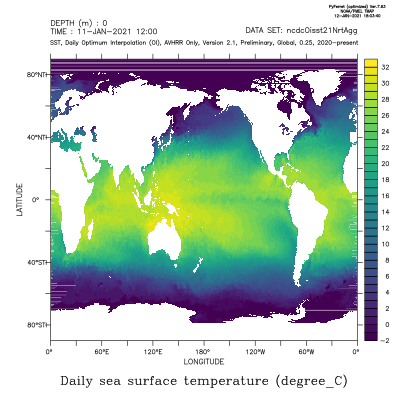

In [9]:
%%ferret -s 400,400

shade sst[l=253]

# Alternative erddap/opendap ingest to ferret/xarray

Not to confuse the issue, but there are other opendap / thredds programs and information you can glean from the opendap services that run parallel to the dataservice.  ERDDAP can provide data in many different formats (see image of example) and your opendap software may need to communicate with a specific service.

<img src="images/fileoutput.png" width="400" height="200" />


# ERDDAP Website driven tips and Tricks

## Complex Searching

(the following is a screen grab from the '?' to the right of the dataset search bar on an erddap server)

<img src="images/ERDDAPSearchTips.png" width="400" height="200" />


## Multi-ERDDAP search locations

[http://erddap.com](http://erddap.com) - this site is setup via a third party (Irish Institute) 

[https://coastwatch.pfeg.noaa.gov/erddap/download/SearchMultipleERDDAPs.html](https://coastwatch.pfeg.noaa.gov/erddap/download/SearchMultipleERDDAPs.html) - developed by Bob Simmons and SWFSC

## Using advanced search (and erddapy) to refine datasets

The advanced search page is available on each independant erddap client (https://ferret.pmel.noaa.gov/pmel/erddap/search/advanced.html as an example for the pmel public version), the examples below will use a python package (erddapy - https://ioos.github.io/erddapy/v0.9.0/01-longer_intro-output.html) to supply keywords to the search terms RESTfully but the web interface is functionally identical.  I will only be passing "Full Text Search" terms but other search parameters can be supplied as well.

For the first example, I am supplying the Full Text Search term - "foci"
for the seond I am supplying the the Full Text Search term - "foci -Bering" where the '-' removes a results with the word chosen

In [3]:
# using erddapy - an alternative to the opendap protocal of xarray/ferret
from erddapy import ERDDAP
from erddapy.doc_helpers import show_iframe

In [4]:
#specify general erddap url
e = ERDDAP(server="https://ferret.pmel.noaa.gov/pmel/erddap/")

In [5]:
#pass search terms in as you would on the web interface, show the html response in-line
from erddapy.doc_helpers import show_iframe

search_url = e.get_search_url(search_for="foci", response="html")

**search for just for 'foci' on the pmel server**

In [6]:
show_iframe(search_url)

**find all foci datasets and remove any dataset with 'Bering' in the searchable terms (this drops a single dataset from the previous results)**

In [7]:
search_url = e.get_search_url(search_for="foci -Bering", response="html")
show_iframe(search_url)

# ERDDAPY and opendap tabular and gridded

In [8]:
d = ERDDAP(server="https://ferret.pmel.noaa.gov/pmel/erddap/",
    protocol='tabledap',
    response='opendap',
)
d.dataset_id="dy1104_profile_data"

isnc=True
isCSV = False
if isCSV:
    df_m = d.to_pandas(
                #index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,)  # units information can be dropped.
                )
    df_m.sort_index(inplace=True)
    df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

if isnc:
    df_m = d.to_xarray()
df_m

<xarray.Dataset>
Dimensions:                                         (obs: 1639, profile: 26)
Coordinates:
    time                                            (profile) datetime64[ns] ...
    longitude                                       (profile) float32 ...
    latitude                                        (profile) float32 ...
    depth                                           (obs) float32 ...
Dimensions without coordinates: obs, profile
Data variables:
    id                                              (profile) object ...
    cast                                            (profile) object ...
    cruise                                          (profile) object ...
    lon360                                          (profile) float32 ...
    rowSize                                         (profile) int32 ...
    ocean_practical_salinity_2                      (obs) float32 ...
    ocean_practical_salinity_1                      (obs) float32 ...
    ocean_dissolved_oxygen_concentration_2_mMperkg  (obs) float32 ...
    ocean_temperature_1                             (obs) float32 ...
    ocean_oxygen_saturation_1                       (obs) float32 ...
    ocean_dissolved_oxygen_concentration_1_mMperkg  (obs) float32 ...
    ocean_temperature_2                             (obs) float32 ...
    sea_water_nutrient_bottle_number                (obs) float32 ...
    photosynthetically_active_radiation             (obs) float32 ...
    photosynthetically_active_radiation_raw         (obs) float32 ...
    ocean_chlorophyll_a_concentration_factoryCal    (obs) float32 ...
    ocean_sigma_t                                   (obs) float32 ...
    ocean_dynamic_height                            (obs) float32 ...
    sea_water_ammonium_concentration                (obs) float32 ...
    sea_water_nitrate_concentration                 (obs) float32 ...
    sea_water_silicate_concentration                (obs) float32 ...
    sea_water_phosphate_concentration               (obs) float32 ...
    sea_water_nitrite_concentration                 (obs) float32 ...
    ocean_chlorophyll_fluorescence_raw              (obs) float64 ...
Attributes:
    AIR_TEMP:                      6.6
    BAROMETER:                     0
    CAST:                          028
    cdm_data_type:                 Profile
    cdm_profile_variables:         id, cast, cruise, time, longitude, lon360,...
    COMPOSITE:                     0
    Conventions:                   CF-1.6, COARDS, ACDD-1.3
    creation_date:                 June 27, 2018 19:24 UTC
    creator_name:                  PMEL EcoFOCI
    creator_type:                  institution
    CRUISE:                        dy1104
    DATA_CMNT:                     ,
    DATA_TYPE:                     CTD
    Easternmost_Easting:           -163.8388
    EPIC_FILE_GENERATOR:           EcoFOCI_netCDF_write.py 0.4.0
    featureType:                   Profile
    geospatial_lat_max:            60.07633
    geospatial_lat_min:            56.65417
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            -163.8388
    geospatial_lon_min:            -172.1755
    geospatial_lon_units:          degrees_east
    geospatial_vertical_max:       72.0
    geospatial_vertical_min:       0.0
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    history:                       FERRET V7.42 (optimized)  2-Aug-18\n2021-0...
    id:                            dy1104_profile_data_e698_69e3_e309
    infoUrl:                       www.ecofoci.noaa.gov
    institution:                   PMEL EcoFOCI
    keywords:                      active, ammonia, ammonium, bottle, calibra...
    keywords_vocabulary:           GCMD Science Keywords
    license:                       The data may be used and redistributed for...
    Northernmost_Northing:         60.07633
    sourceUrl:                     (local files)
    Southernmost_Northing:         56.65417
    standard_name_vocab

In [9]:
from netCDF4 import Dataset

opendap_url = d.get_download_url(
    response="opendap",
)
with Dataset(opendap_url) as nc:
    print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    AIR_TEMP: 6.6
    BAROMETER: 0
    CAST: 028
    cdm_data_type: Profile
    cdm_profile_variables: id, cast, cruise, time, longitude, lon360, latitude
    COMPOSITE: 0
    Conventions: CF-1.6, COARDS, ACDD-1.3
    creation_date: June 27, 2018 19:24 UTC
    creator_name: PMEL EcoFOCI
    creator_type: institution
    CRUISE: dy1104
    DATA_CMNT: ,
    DATA_TYPE: CTD
    Easternmost_Easting: -163.8388
    EPIC_FILE_GENERATOR: EcoFOCI_netCDF_write.py 0.4.0
    featureType: Profile
    geospatial_lat_max: 60.07633
    geospatial_lat_min: 56.65417
    geospatial_lat_units: degrees_north
    geospatial_lon_max: -163.8388
    geospatial_lon_min: -172.1755
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 72.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive: down
    geospatial_vertical_units: m
    history: FERRET V7.42 (optimized)  2-Aug-18
2021-01-19T17:36:1

# ERDDAP for OpenDap endpoints

Given Ferret/PyFerret/Xarray's challenge with opendap access of tabular datasets... how to better share the "content" of the netcdf file?

- xarray for gridded data
- erddapy for python (tabular or gridded)
- weblink (and netcdf files inherently), perhaps autodownloaded (or just the final data point?)